### hw_04: Plane Detection

**Exploratory analysis of example datasets and results.**

In [1]:
import numpy as np
#from laspy.file import File
import laspy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

**urban_subset**

In [13]:
#Read LAS file
inFile = laspy.read("urban_subset.las")#, mode = "r")

In [14]:
print('Examining Point Format: ')
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time
red
green
blue


In [15]:
#Import LAS into numpy array 
lidar_points = np.array((inFile.x, inFile.y, inFile.z, inFile.intensity,
                         inFile.classification, inFile.scan_angle_rank,
                         inFile.red, inFile.green, inFile.blue)).transpose() # inFile.return_number,

#colors = np.vstack((inFile.red, inFile.green, inFile.blue)).transpose()
print(len(lidar_points))

357717


In [16]:
#Transform to pandas DataFrame
lidar_df = pd.DataFrame(lidar_points, columns=['x', 'y', 'z', 'intensity', 'classi', 
                                          'scan_angle', 'red', 'green', 'blue'])

In [17]:
lidar_df.describe()

,x,y,z,intensity,classi,scan_angle,red,green,blue
count,357717.000000,357717.000000,357717.000000,357717.000000,357717.000000,357717.000000,357717.000000,357717.000000,357717.000000
mean,91594.315769,438199.629365,4.700281,155.064160,1.360822,-4.547656,2030.762866,29335.120131,35703.710274
std,61.941772,38.613149,6.609751,215.665962,0.480240,6.707519,7229.261474,23906.307229,23872.567944
min,91464.379997,438143.039993,-2.590000,1.000000,1.000000,-33.000000,0.000000,512.000000,0.000000
25%,91546.319997,438167.919993,-1.330000,40.000000,1.000000,-8.000000,0.000000,5888.000000,9984.000000
50%,91587.199997,438192.719993,2.570000,134.000000,1.000000,-3.000000,0.000000,22528.000000,42496.000000
75%,91643.129997,438225.559993,10.290000,235.000000,2.000000,0.000000,0.000000,54784.000000,59136.000000
max,91737.559997,438300.939993,40.440000,42502.000000,2.000000,4.000000,65280.000000,65280.000000,64512.000000


In [18]:
print('diff x:', lidar_df.x.min() - lidar_df.x.max())
print('diff y:', lidar_df.y.min() - lidar_df.y.max())
print('diff z:', lidar_df.z.min() - lidar_df.z.max())

diff x: -273.179999999993
diff y: -157.90000000002328
diff z: -43.03


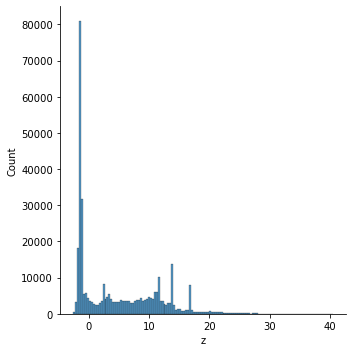

In [19]:
sns.displot(lidar_df.z)
plt.show()

In [20]:
factor=20
decimated_points_random = lidar_df[::factor]
print(len(decimated_points_random))

17886


In [21]:
extent = x_min, x_max, y_min, y_max = [lidar_df.x.min()-50, 
                                       lidar_df.x.max()+50,
                                       lidar_df.y.min()-50, 
                                       lidar_df.y.max()+50]

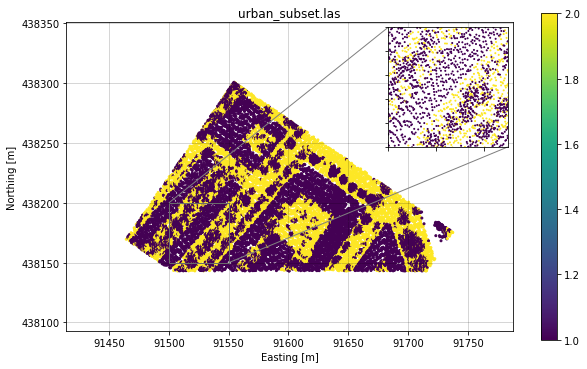

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

cm = ax.scatter(decimated_points_random.x, decimated_points_random.y, 
                c=decimated_points_random.classi,
                #c=decimated_points_random.class, 
                #c=decimated_points_random.scan_angle,
                s=4)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('urban_subset.las')
ax.grid(c='k', alpha=0.2)
fig.colorbar(cm)

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.scatter((decimated_points_random.x), (decimated_points_random.y), 
              #c=decimated_points_random.z,
              #c=(decimated_points_random.intensity),
              c=(decimated_points_random.classi),
              s=1)
axins.set_xlim(91500, 91550)
axins.set_ylim(438150, 438200)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

**urban**

In [3]:
#Read LAS file
inFile = laspy.read("urban.las")#, mode = "r")

In [4]:
print('Examining Point Format: ')
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time
red
green
blue


In [5]:
#Import LAS into numpy array 
lidar_points = np.array((inFile.x, inFile.y, inFile.z, inFile.intensity,
                         inFile.classification, inFile.scan_angle_rank,
                         inFile.red, inFile.green, inFile.blue)).transpose() # inFile.return_number,

#colors = np.vstack((inFile.red, inFile.green, inFile.blue)).transpose()
print(len(lidar_points))

2074272


In [6]:
#Transform to pandas DataFrame
lidar_df = pd.DataFrame(lidar_points, columns=['x', 'y', 'z', 'intensity', 'classi', 
                                          'scan_angle', 'red', 'green', 'blue'])

In [7]:
lidar_df.describe()

,x,y,z,intensity,classi,scan_angle,red,green,blue
count,2.074272e+06,2.074272e+06,2.074272e+06,2.074272e+06,2.074272e+06,2.074272e+06,2074272.0,2074272.0,2074272.0
mean,9.167174e+04,4.382816e+05,4.162064e+00,1.347611e+02,1.348809e+00,-1.571894e+01,51200.0,11008.0,53248.0
std,1.337026e+02,7.016511e+01,5.882595e+00,1.557442e+02,4.765936e-01,9.676212e+00,0.0,0.0,0.0
min,9.144387e+04,4.381430e+05,-2.810000e+00,1.000000e+00,1.000000e+00,-3.400000e+01,51200.0,11008.0,53248.0
25%,9.155536e+04,4.382225e+05,-1.320000e+00,3.300000e+01,1.000000e+00,-2.400000e+01,51200.0,11008.0,53248.0
50%,9.166659e+04,4.382918e+05,2.640000e+00,1.110000e+02,1.000000e+00,-1.800000e+01,51200.0,11008.0,53248.0
75%,9.178563e+04,4.383437e+05,9.060000e+00,2.120000e+02,2.000000e+00,-7.000000e+00,51200.0,11008.0,53248.0
max,9.190305e+04,4.383875e+05,4.368000e+01,4.250200e+04,2.000000e+00,4.000000e+00,51200.0,11008.0,53248.0


In [8]:
print('diff x:', lidar_df.x.min() - lidar_df.x.max())
print('diff y:', lidar_df.y.min() - lidar_df.y.max())
print('diff z:', lidar_df.z.min() - lidar_df.z.max())

diff x: -459.18000000000757
diff y: -244.45999999996275
diff z: -46.49


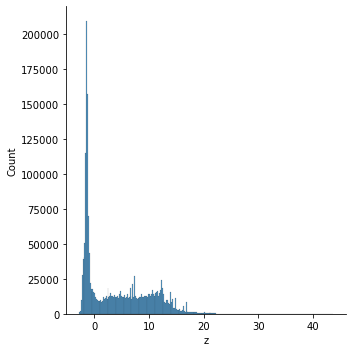

In [9]:
sns.displot(lidar_df.z)
plt.show()

In [10]:
factor=20
decimated_points_random = lidar_df[::factor]
print(len(decimated_points_random))

103714


In [11]:
extent = x_min, x_max, y_min, y_max = [lidar_df.x.min()-50, 
                                       lidar_df.x.max()+50,
                                       lidar_df.y.min()-50, 
                                       lidar_df.y.max()+50]

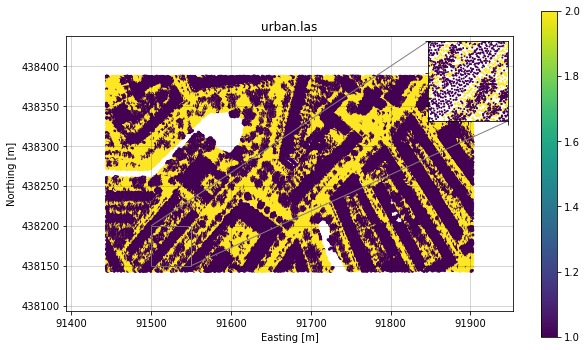

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

cm = ax.scatter(decimated_points_random.x, decimated_points_random.y, 
                c=decimated_points_random.classi,
                #c=decimated_points_random.class, 
                #c=decimated_points_random.scan_angle,
                s=4)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('urban.las')
ax.grid(c='k', alpha=0.2)
fig.colorbar(cm)

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.scatter((decimated_points_random.x), (decimated_points_random.y), 
              #c=decimated_points_random.z,
              #c=(decimated_points_random.intensity),
              c=(decimated_points_random.classi),
              s=1)
axins.set_xlim(91500, 91550)
axins.set_ylim(438150, 438200)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

**result** - black represents 'no classification'

![title](./img/urban_subset.png)

![title](./img/urban.png)

![title](./img/extra.png)

**shapes: concave Hull**

**urban_subset**

![title](./img/urban_subset_sh.png)

**urban**

![title](./img/urban_sh.png)